# section 1




In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def load_yelp_data(n_rows):
    PATH_TO_YELP_REVIEWS = "/content/drive/MyDrive/Colab Notebooks/HW2/yelp_academic_dataset_review.json"


    # read only the required number of rows from the file
    data = []
    with open(PATH_TO_YELP_REVIEWS, 'r') as f:
        for i in range(n_rows):
            line = f.readline()
            if not line:
                break
            data.append(line)

    data_json_str = "[" + ','.join(data) + "]"

    # load the data into pandas
    data_df = pd.read_json(data_json_str)

    return data_df

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1

# Function to retrieve top few number of each category
def get_top_data(data_df, top_n = 5000):
    data_df['sentiment'] = [ map_sentiment(x) for x in data_df['stars']]
    top_data_df_positive = data_df[data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = data_df[data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = data_df[data_df['sentiment'] == 0].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_small

# load the first 100000 rows from the Yelp review data and extract the top few samples of each sentiment
data_df = load_yelp_data(n_rows=100000)
top_data_df_small = get_top_data(data_df, top_n=10000)

# print the sentiment distribution and the first 10 rows of the subset DataFrame
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)


Mounted at /content/drive
After segregating and taking equal number of rows for each sentiment:
 1    10000
-1    10000
 0    10000
Name: sentiment, dtype: int64


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1
10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,1
11,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,1
12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,1
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,1
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,1


In [ ]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

Restaurant good service!!
I like food!!
This product good!!


In [ ]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']] 
print(top_data_df_small['tokenized_text'].head(10))

1     [ve, taken, lot, of, spin, classes, over, the,...
3     [wow, yummy, different, delicious, our, favori...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [loved, this, tour, grabbed, groupon, and, the...
7     [amazingly, amazing, wings, and, homemade, ble...
10    [my, experience, with, shalimar, was, nothing,...
11    [locals, recommended, milktooth, and, it, an, ...
12    [love, going, here, for, happy, hour, or, dinn...
13    [good, food, loved, the, gnocchi, with, marina...
14    [the, bun, makes, the, sonoran, dog, it, like,...
Name: tokenized_text, dtype: object


In [ ]:

from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

1     [ve, taken, lot, of, spin, class, over, the, y...
3     [wow, yummi, differ, delici, our, favorit, is,...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [love, thi, tour, grab, groupon, and, the, pri...
7     [amazingli, amaz, wing, and, homemad, bleu, ch...
10    [my, experi, with, shalimar, wa, noth, but, wo...
11    [local, recommend, milktooth, and, it, an, ama...
12    [love, go, here, for, happi, hour, or, dinner,...
13    [good, food, love, the, gnocchi, with, marinar...
14    [the, bun, make, the, sonoran, dog, it, like, ...
Name: stemmed_tokens, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_small['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
 1    7036
-1    7008
 0    6956
Name: sentiment, dtype: int64
Value counts for Test sentiments
 0    3044
-1    2992
 1    2964
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool                date  funny  \
0  41964  h7zxeLAdUyAO6S6UzXJDwA     0 2018-05-20 02:15:46      0   
1  21237  ySXKjndttZjNy3kcqRqG3g     0 2015-12-20 20:30:12      0   
2  43742  9gObo5ltOMo6UgsaXaHPWA     0 2015-12-05 23:57:22      0   
3  35107  tvbFcYCEQWc76CUK-nBw8w     0 2018-07-27 08:09:21      0   
4   2960  Yv6HUVu7fRMnt_NtGdVQBw     0 2018-06-19 18:16:51      0   

                review_id  stars  \
0  xkcYjM_5w9rdSiN8_Qz_Tg      1   
1  XIYnB19-LAI_yzJfB2d7eQ      3   
2  Nm2XaG0sQ7p3LHoZG44cAg      1   
3  L8Ape_IoEHiMjgiufwCp8Q      3   
4  0uD1hdeUNPyfAaGOKpMMeQ      5   

                                                text  useful  \
0  Kids talking and being disruptive 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
from gensim.models import Word2Vec
size = 500
window = 3
min_count = 1
workers = 3
sg = 1

# Function to train word2vec model
def make_word2vec_model(top_data_df_small, padding=True, sg=1, min_count=1, vector_size=500, workers=3, window=3):
    if  padding:
        print(len(top_data_df_small))
        temp_df = pd.Series(top_data_df_small['stemmed_tokens']).values
        temp_df = list(temp_df)
        temp_df.append(['pad'])
        word2vec_file = '/content/drive/MyDrive/Colab Notebooks/HW2/' + 'modelsLSTM/' + 'word2vec_' + str(vector_size) + '_PAD.model'
    else:
        temp_df = top_data_df_small['stemmed_tokens']
        word2vec_file = '/content/drive/MyDrive/Colab Notebooks/HW2/' + 'modelsLSTM/' + 'word2vec_' + str(vector_size) + '.model'
    w2v_model = Word2Vec(temp_df, min_count = min_count, vector_size = vector_size, workers = workers, window = window, sg = sg)

    w2v_model.save(word2vec_file)
    return w2v_model, word2vec_file

# Train Word2vec model
w2vmodel, word2vec_file = make_word2vec_model(top_data_df_small, padding=True, sg=sg, min_count=min_count, vector_size=size, workers=workers, window=window)


30000


In [ ]:
max_sen_len = top_data_df_small.stemmed_tokens.map(len).max()
padding_idx = w2vmodel.wv.key_to_index['pad']
def make_word2vec_vector_lstm(sentence):
    return torch.tensor([w2vmodel.wv.key_to_index.get(word, padding_idx) for word in sentence], dtype=torch.long, device=device).view(1, -1)




In [ ]:
def make_target(label, num_classes=3):
    if label == -1:
        target = torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        target = torch.tensor([1], dtype=torch.long, device=device)
    else:
        target = torch.tensor([2], dtype=torch.long, device=device)

    # Convert to one-hot encoding if num_classes is greater than 2
    if num_classes > 2:
        target = F.one_hot(target, num_classes=num_classes)

    return target

In [ ]:
import gensim

class LstmTextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LstmTextClassifier, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        embedded = self.embedding(x)
        
        output, (hidden, cell) = self.lstm(embedded)
        
        hidden = hidden[-1] # take the last hidden state
        
        dense_outputs = self.fc(hidden)
        
        probs = F.softmax(dense_outputs, dim=1)
        
        return probs

In [ ]:
NUM_CLASSES = 3
VOCAB_SIZE = len(w2vmodel.wv.key_to_index)
HIDDEN_DIM = 100
NUM_LAYERS = 1

lstm_model = LstmTextClassifier(input_dim=VOCAB_SIZE, hidden_dim=HIDDEN_DIM, output_dim=NUM_CLASSES, num_layers=NUM_LAYERS)
lstm_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

num_epochs = 30

# Open the file for writing loss
loss_file_name = '/content/drive/MyDrive/Colab Notebooks/HW2/' + 'plotsLSTM/' + 'lstm_class_big_loss_with_padding.csv'
f = open(loss_file_name,'w')
f.write('iter, loss')
f.write('\n')

losses = []
lstm_model.train()

for epoch in range(num_epochs):
    print("Epoch" + str(epoch + 1))
    train_loss = 0
    
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        lstm_model.zero_grad()

        # Make the bag of words vector for stemmed tokens 
        bow_vec = make_word2vec_vector_lstm(row['stemmed_tokens'])
        
        # Forward pass to get output
        probs = lstm_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['sentiment'][index])
        target = target.float() # convert to float tensor
        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

    print("Epoch ran :"+ str(epoch+1))
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0

torch.save(lstm_model, '/content/drive/MyDrive/Colab Notebooks/HW2/' + 'lstm_big_model_500_with_padding.pth')

f.close()

print("Input vector")
print(bow_vec.cpu().numpy())
print("Probs")
print(probs)
print(torch.argmax(probs, dim=1).cpu().numpy()[0])


Epoch1
Epoch ran :1
Epoch2
Epoch ran :2
Epoch3
Epoch ran :3
Epoch4
Epoch ran :4
Epoch5
Epoch ran :5
Epoch6
Epoch ran :6
Epoch7
Epoch ran :7
Epoch8
Epoch ran :8
Epoch9
Epoch ran :9
Epoch10
Epoch ran :10
Epoch11
Epoch ran :11
Epoch12
Epoch ran :12
Epoch13
Epoch ran :13
Epoch14
Epoch ran :14
Epoch15
Epoch ran :15
Epoch16
Epoch ran :16
Epoch17
Epoch ran :17
Epoch18
Epoch ran :18
Epoch19
Epoch ran :19
Epoch20
Epoch ran :20
Epoch21
Epoch ran :21
Epoch22
Epoch ran :22
Epoch23
Epoch ran :23
Epoch24
Epoch ran :24
Epoch25
Epoch ran :25
Epoch26
Epoch ran :26
Epoch27
Epoch ran :27
Epoch28
Epoch ran :28
Epoch29
Epoch ran :29
Epoch30
Epoch ran :30
Input vector
[[  34  288 2478    1  175   22    7  201    1  248   86  188   12   78
   997  272]]
Probs
tensor([[4.3645e-14, 5.9531e-08, 1.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
2


Index(['iter', ' loss'], dtype='object')
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2992
           1       0.63      0.61      0.62      3044
           2       0.76      0.80      0.78      2964

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.72      9000
weighted avg       0.72      0.72      0.72      9000

Index(['iter', ' loss'], dtype='object')


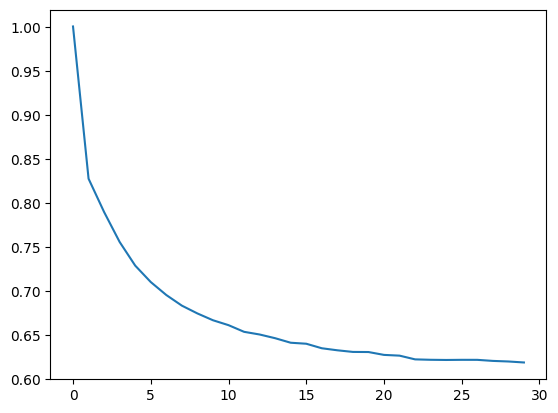

In [ ]:
from sklearn.metrics import classification_report

bow_lstm_predictions = []
original_labels_lstm_bow = []
lstm_model.eval()

loss_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW2/plotsLSTM/' + 'lstm_class_big_loss_with_padding.csv')
print(loss_df.columns)
# loss_df.plot('loss')

with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_word2vec_vector_lstm(row['stemmed_tokens'])
        probs = lstm_model(bow_vec)
        _, predicted = torch.max(probs.data, 1)
        bow_lstm_predictions.append(predicted.cpu().numpy()[0])
        original_label = make_target(Y_test['sentiment'][index]).argmax().cpu().numpy()
        original_labels_lstm_bow.append(original_label)

print(classification_report(original_labels_lstm_bow, bow_lstm_predictions))
loss_file_name = '/content/drive/MyDrive/Colab Notebooks/HW2/' + 'plotsLSTM/' + 'lstm_class_big_loss_with_padding.csv'
loss_df = pd.read_csv(loss_file_name)
print(loss_df.columns)

plt_500_padding_30_epochs = loss_df[' loss'].plot()
fig = plt_500_padding_30_epochs.get_figure()